### Step 1. Open the data file and study the general information. 

In [620]:
import pandas as pd
data = pd.read_csv('/datasets/vehicles_us.csv')
print(data.head())
data.info()

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price   

From info() method I get that there are missing values in 'model_year', 'cylinders','odometer','paint_color','is_4wd'. I can see there are a lot of missing values for 'is_4wd', even 50%, so we should for sure have a look into that. 'paint_color' is the only value in object type.

dtype for 'model_year' and 'cylinders' are float64 type but they should be int64.
date_posted is in object type and it should be convert to datetime64, because if we work later with it, Python will understand values in this type.

In [621]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
print(report)

              missing_values  % of total
price                      0        0.00
model_year              3619        0.07
model                      0        0.00
condition                  0        0.00
cylinders               5260        0.10
fuel                       0        0.00
odometer                7892        0.15
transmission               0        0.00
type                       0        0.00
paint_color             9267        0.18
is_4wd                 25953        0.50
date_posted                0        0.00
days_listed                0        0.00


We can read the percentage of missing values in each column, which helps us determine what kind of method is best to use when filling up the missing values. 

'paint_color' is the only missing value in object tipe with 18% of missing value which is quite a lot. It is a categorical variable so we cannot find coorelation with other missing values which are quantitative type. I will convert missing values in 'paint_color' to "Unknown" becase any other filling approach could distort initial data (cosidering 18% missing values.)

In [622]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


Minimum value in 'price' column is 1. It is not possible for the value of a vehicle to be 1, this is for sure an artifact.

Minimum value for 'model_year' is 1908, we should look up these rows and see is this also a possible artifact.

Also, we can read the minimun value for 'odometer' is 0 and we should check is there a logical explanation for the mileage of a vehicle to be 0 (new car, for example.) 

Standard deviation for 'is_4wd' is 0, this means all the values are the same, 1. dtype is float64 but considering 'is_4wd' tells us whether the vehicle has 4-wheel drive or not, dtype should be converted to Boolean type.

Minimum value in days_listed is 0. This could mean the vehicles were sold in less than a day. This value could be an artifact. 

In [623]:
print(data.duplicated().sum())

0


duplicated() method gives us the number of duplicated rows in the data set. There aren't any.

In [624]:
too_small_price = data.query('price == 1')
print(len(too_small_price))

798


There are actually 798 ads with a price equals to 1. I will consider these values as missing value for 'price'.

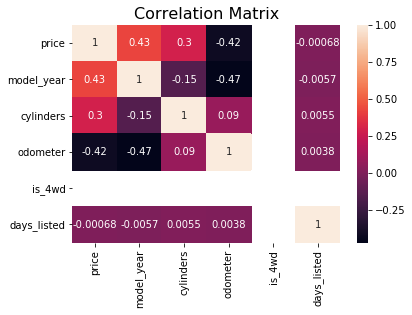

In [625]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.title('Correlation Matrix', fontsize=16)
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

I used the seaborn and matplotlib packages in order to get a visual representation of the correlation matrix.

The goal of this assignment is to determine which factors influence the price of a vehicle so we are looking positive or negative appropriate correlations to find these factor. In the matrix we can read Pearson correlation coefficient which tells us how much one value changes when the other changes. It takes values from -1 to 1. The closer the coefficient is to -1 or 1 , the stronger the dependency. Close to 0, we have weak connection. Zero means there is no dependency or there is complex and non-linear relationship. 

'price' has the strongest correlation with 'model_year' (0.43), 'model_year' with 'odometer' (-0.47) and vice versa. 'cylinders' have the strongest correlation with 'model_year' (-0.47).
Correlation matrix can also help in determing how to fill the missing values so I will consider this descriptive statistic when I will fill up the missing value.


### Conclusion

'model_year' and 'cylinders' should be converted into int64 type, 'date_posted' to datetime64, 'is_4wd' to bool type.

All the missing values in 'paint_color' I will fill with 'Unknown'.

There are no duplicated rows but I did find artifacts; 'price' == 1. I will consider this a missing value which needs to be replaced with another one.

I need to check rows where 'model_year' == 1908, where 'odometer' == 0.

I found correlations between some quantitative values and I will consider this when filling up the missing values.

### Step 2. Data preprocessing

In [626]:
data['is_4wd'] = data['is_4wd'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: bool(1), float64(3), int64(2), object(7)
memory usage: 4.8+ MB


I converted 'is_4wd' to bool type, and then we can see using info() method, there are no more missing values.

In [627]:
data['date_posted'] = pd.to_datetime(data['date_posted'],format='%Y-%m-%d')
data.dtypes

price                    int64
model_year             float64
model                   object
condition               object
cylinders              float64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                    bool
date_posted     datetime64[ns]
days_listed              int64
dtype: object

I converted 'date_posted' to datetime64 type and checked it with dtypes attribute.

In [628]:
data['paint_color'] = data['paint_color'].fillna('Unknown')
print(data.query('paint_color.isnull()'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


I filled missing values in 'paint_color' with 'Unknown' string and checked are there any missing values left. There aren't any.
One of the reasons why the values are missing in 'paint_color' could be the seller included photo of the vehicle in the add. Then the color is obvious from the photo and there is no big need to emphasize 'paint_color'. Maybe one of the value in process of collecting the data could be 'photo_in_add' with bool type.

In [629]:
print(data.query('model_year == 1908'))

       price  model_year              model  condition  cylinders fuel  \
33906  12995      1908.0          gmc yukon       good        8.0  gas   
33907  12995      1908.0  cadillac escalade  excellent        8.0  gas   

       odometer transmission type paint_color  is_4wd date_posted  days_listed  
33906  169328.0    automatic  SUV       black    True  2018-07-06           34  
33907       NaN    automatic  SUV       white    True  2018-06-24           25  


There are only 2 ads with model_year from 1908. These vehicles are described to be automatic SUVs with 4-wheel drive. This means the vehicles cannot be from the year 1908.

In [630]:
print(report)

              missing_values  % of total
price                      0        0.00
model_year              3619        0.07
model                      0        0.00
condition                  0        0.00
cylinders               5260        0.10
fuel                       0        0.00
odometer                7892        0.15
transmission               0        0.00
type                       0        0.00
paint_color             9267        0.18
is_4wd                 25953        0.50
date_posted                0        0.00
days_listed                0        0.00


We can read that from our raw data, there is 7% missing values in'model_year' so we can be assured that data will not be distort if we drop these 2 rows with 'model_year' == 1908.

In [631]:
data.drop(data.index[(data['model_year'] == 1908)],axis=0,inplace=True)
print(data.query('model_year == 1908'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed]
Index: []


I deleted these 2 rows using drop() method. Afterwards I checked wheter they are deleted!

In [632]:
data = data.reset_index(drop=True)

I reseted the indices after deleting the rows, droping the index column with old indices as values.

In [633]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      47904 non-null float64
model           51523 non-null object
condition       51523 non-null object
cylinders       46263 non-null float64
fuel            51523 non-null object
odometer        43632 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null bool
date_posted     51523 non-null datetime64[ns]
days_listed     51523 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 4.8+ MB


Now we have 51523 entries are left with missing values in model_year, cylinders and odometer.

In [634]:
no_model_year = data.query('model_year.isnull()')
print(no_model_year['model'].value_counts())

ford f-150                           191
chevrolet silverado 1500             155
ram 1500                             117
chevrolet silverado                   98
honda accord                          80
                                    ... 
buick enclave                         14
hyundai santa fe                      13
acura tl                              12
honda civic lx                        11
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64


I did a data slice  no_model_year where I wanted to look up into data where 'model_year' is missing.
Using value_count() we can see what are the most usual 'models' where we have missing 'model_year'..
I will look up into one most common 'model'

In [635]:
ford_f_150 = data.query('model == "ford f-150"')

I am looking up "into ford f 150" model. I want to see most common years in this particular model.

In [636]:
print(ford_f_150['model_year'].value_counts())
print(ford_f_150['model_year'].mean())
print(ford_f_150['model_year'].median())
print(ford_f_150['model_year'].mode())

2013.0    252
2014.0    222
2011.0    222
2010.0    202
2016.0    160
2015.0    150
2012.0    144
2018.0    122
2006.0    122
2005.0    117
2007.0    116
2008.0    107
2004.0     86
2017.0     82
2009.0     73
2003.0     70
2002.0     58
2001.0     44
2000.0     44
1998.0     43
1999.0     36
1997.0     29
1995.0     18
1996.0     14
1994.0     13
1993.0     11
2019.0     10
1989.0      5
1992.0      5
1979.0      5
1991.0      4
1986.0      4
1988.0      4
1987.0      4
1990.0      2
1936.0      1
1954.0      1
1929.0      1
1975.0      1
1977.0      1
Name: model_year, dtype: int64
2009.3547024952015
2011.0
0    2013.0
dtype: float64


Using value_counts method we can read that in model "ford_f_150" there are: 252 vehicles made in 2013, 222 vehicles made in 2014. but also 222 vehicles made in 2011. and 202 vehicles made in 2010. Only looking at the numbers greater than 200 we can conclude it is not smart to use mode() method to fill up the missing values in 'model_year'.
We should use mean or median. mean is 2009. and median is 2011. According to mean and median values the data is skewed so I decided to use median to fill up the missing values in 'model_year'.

In [637]:
import numpy as np
data['model_year'] = data.groupby('model')['model_year'].transform(lambda x : x.fillna(x.median()))

If there is a missing 'model_year' the transform() method will perform the transformation. It will apply median() according to specific 'model' of a missing 'model_year'.

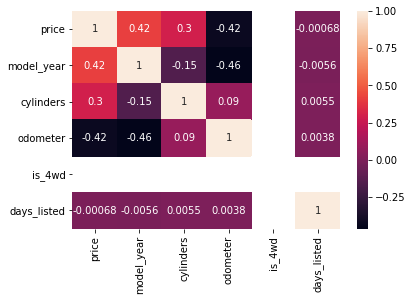

In [638]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Once again checking our correlation matrix, we can se there is a strong dependency between 'model_year' and 'price' (0.42). This mean the "younger" the vehicle, higher the price. This could be the reason why there are around 7% of missing values in 'model_year'.

In [639]:
data['model_year'] = data['model_year'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      51523 non-null int64
model           51523 non-null object
condition       51523 non-null object
cylinders       46263 non-null float64
fuel            51523 non-null object
odometer        43632 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null bool
date_posted     51523 non-null datetime64[ns]
days_listed     51523 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


After filling the missing values, I decided to convert 'model_year' type from float64 to int64.

We can see now that 'model_year' has no more mising values. Now we need to look at 'cylinders' and 'odometer'.
Again looking at our correlation matrix, we can see 'cylinders' have the strongest correlation with 'price' (0.3).
It means the biger number of cylinders, the higer price of a vehicle. This could be one of the reasons why there are 10% missing values in 'cylinders'.

In [640]:
no_cylinder = data.query('cylinders.isnull()')
print(no_cylinder['model'].value_counts())

ford f-150                           316
chevrolet silverado 1500             231
ram 1500                             185
chevrolet silverado                  137
ram 2500                             122
                                    ... 
ford f150 supercrew cab xlt           20
ford f350 super duty                  20
dodge dakota                          18
bmw x5                                16
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64


Again, we can see the models with the most missing values in 'model_year' are the same models with the most missing values in 'cylinder'.

In [641]:
print(ford_f_150['cylinders'].value_counts())
print(ford_f_150['cylinders'].mode())
print(ford_f_150['cylinders'].mean())
print(ford_f_150['cylinders'].median())

8.0     1584
6.0      863
10.0      18
4.0       11
5.0        2
3.0        2
Name: cylinders, dtype: int64
0    8.0
dtype: float64
7.294354838709677
8.0


Now the mode and the median are equal but I decided again to take the median to fill up the missing values in 'cylinders'.

In [642]:
data['cylinders'] = data.groupby('model')['cylinders'].transform(lambda x : x.fillna(x.median()))

I used the grouping of the data too fill in the missing values.

In [643]:
data['cylinders'] = data['cylinders'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      51523 non-null int64
model           51523 non-null object
condition       51523 non-null object
cylinders       51523 non-null int64
fuel            51523 non-null object
odometer        43632 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null bool
date_posted     51523 non-null datetime64[ns]
days_listed     51523 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


Now there are only missing values in 'cylinders' left and I converted float64 type to int64 type.

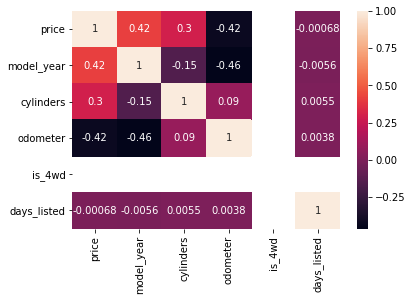

In [644]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

Again from our correlation matrix we can read there is the strongest  correlation between 'odometer' and 'model_year' (-0.46.)
This would mean the higher the 'model_year' (the "younger" the vehical), the lower the mileage. This is why I decided to fill up missing values in 'odometer' with corresponding mileage grouped by a 'model_year'.

As well, we can see stong dependency with 'price' and 'odometer' (-0.42). It means the higher mileage, lower the price of a vehicle. This is probably why there are 15% missing values in 'odometer'. People would rather not talk about how many miles has their vehicle in the wheels. 

In [645]:
print(data.query('odometer.isnull()')['model_year'].value_counts())
print(data.query('odometer.isnull()')['model_year'].mean())
print(data.query('odometer.isnull()')['model_year'].median())
print(data.query('odometer.isnull()')['model_year'].mode())

2013    645
2012    613
2011    612
2008    558
2014    557
2015    519
2010    463
2016    455
2007    406
2017    381
2009    369
2018    343
2005    330
2006    325
2004    252
2003    216
2002    162
2000    138
2001    130
1999     78
1998     61
1997     55
2019     52
1996     26
1995     24
1993     22
1994     19
1989     14
1986      8
1990      8
1992      8
1991      5
1988      4
1968      4
1966      4
1970      3
1977      3
1978      2
1983      2
1975      1
1964      1
1987      1
1976      1
1980      1
1979      1
1963      1
1971      1
1985      1
1982      1
1974      1
1929      1
1973      1
1981      1
1960      1
Name: model_year, dtype: int64
2009.8415916867318
2011.0
0    2013
dtype: int64


I have checked what are the most common years for vehicles with a missing value in 'odometer'.
I printed mean 'model_year', median and mode. Considering these values, I will fill the missing values in 'odometer' again using median value.

In [646]:
data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x : x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [647]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51523 entries, 0 to 51522
Data columns (total 13 columns):
price           51523 non-null int64
model_year      51523 non-null int64
model           51523 non-null object
condition       51523 non-null object
cylinders       51523 non-null int64
fuel            51523 non-null object
odometer        51522 non-null float64
transmission    51523 non-null object
type            51523 non-null object
paint_color     51523 non-null object
is_4wd          51523 non-null bool
date_posted     51523 non-null datetime64[ns]
days_listed     51523 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


There is one missing value left in 'odometer'. Let's check this.

In [648]:
data[data.isnull().any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45692,18000,1929,ford f-150,good,8,gas,NaN,manual,other,silver,True,2018-11-18,59


For some reason, there is one row with missing value in 'odometer'. It was not filled during the last transform method. I will delete this row.

<font color='Purple'> I have no idea why the transform function did not work on this row. </font>

In [649]:
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True,drop=True)
print(data.head())
data.info()

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas  145000.0   
1  25500        2011      ford f-150       good          6  gas   88705.0   
2   5500        2013  hyundai sonata   like new          4  gas  110000.0   
3   1500        2003      ford f-150       fair          8  gas  161397.0   
4  14900        2017    chrysler 200  excellent          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV     Unknown    True  2018-06-23           19  
1    automatic  pickup       white    True  2018-10-19           50  
2    automatic   sedan         red    True  2019-02-07           79  
3    automatic  pickup     Unknown    True  2019-03-22            9  
4    automatic   sedan       black    True  2019-04-02           28  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51522 entries, 0 to 51521
Data columns (total 13 columns):
price   

There are no missing values left.

In [650]:
data.describe()

,price,model_year,cylinders,odometer,days_listed
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799076,6.120958,115197.207106,39.554773
std,10041.060628,6.056042,1.657443,62083.267532,28.204877
min,1.000000,1936.000000,3.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,73500.000000,19.000000
50%,9000.000000,2011.000000,6.000000,114072.000000,33.000000
75%,16838.000000,2014.000000,8.000000,152809.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000


I will replace all the zero values in 'odometer' with corresponding median value determined by grouping the 'model_year'.

In [651]:
data['odometer'] = data.groupby('model_year')['odometer'].transform(lambda x : x.replace(0,x.median()))

In [652]:
data.describe()

,price,model_year,cylinders,odometer,days_listed
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799076,6.120958,115616.485336,39.554773
std,10041.060628,6.056042,1.657443,61746.666830,28.204877
min,1.000000,1936.000000,3.000000,1.000000,0.000000
25%,5000.000000,2007.000000,4.000000,74000.000000,19.000000
50%,9000.000000,2011.000000,6.000000,114764.500000,33.000000
75%,16838.000000,2014.000000,8.000000,153000.000000,53.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.000000


We can compare descriptive statistic before and after the replacing zeros. The values did not change significantly.

In [653]:
print(len(data.query('price == 1'))/len(data))

0.015488529172004193


There is only 1 percent of data with price equals 1. So I will ignore this artifact because it does not significaly effects my data.

In [654]:
print(len(data.query('days_listed == 0'))/len(data))

0.0010480959590078024


Pecentage of data with ads listed 0 days is also very low so I will not change it as well.

### Conclusion

In the data preprocessing part I have changed types pf some data parameters ('is_4wd' to bool,'date_posted' to datetime64, 'model_year' and 'cylinders' to int64.
I filled all the missing values using group method and median value.
All together, I deleted 3 rows.
Zero values for 'odometer' have been replaced with corresponding median value of grouped data by 'model_year'.
Some artifacts I left unchanged becase their shair in data is not significant.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary: second iteration of the review <a class="tocSkip"> </h2>
    <br/>
<b>Well done!👍:</b> 
        
Ok, you are doing great! It is really nice that you try to reconsider your work with missing values, I hope it was useful for the widening of your knowledge and practice!

### Step 3. Make calculations and add them to the table

In [655]:
data['day_of_ad_placement'] = data['date_posted'].dt.day_name()

Using .dt.day_name I added a new 'day_of_ad_placement' column to store the day of the week the ad was placed.

In [656]:
data['month_of_ad_placement'] = data['date_posted'].dt.month_name()

Using .dt.month_name I added a new 'month_of_ad_placement' column to store the month of the year the ad was placed.

In [657]:
data['year_of_ad_placement'] = data['date_posted'].dt.year

Using .dt.year I added a new 'year_of_ad_placement' column to store the year the ad was placed.

In [658]:
data['age_of_vehicle'] = data['year_of_ad_placement'] - data['model_year']

I added a column of vehicle's age (in years) when the ad was placed.

In [659]:
data['age_of_vehicle'].describe()

count    51522.000000
mean         8.508404
std          6.070014
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         82.000000
Name: age_of_vehicle, dtype: float64

describe() method shows us that we have zero value for some 'age_of_vehicle'.
I will replace all zeros with 1 in 'age_of_vehicle'. It is more practical for future calculations because next task is dividing with 'age_of_vehicle', and dividing with 0 is not defined in mathematics.

In [660]:
data['age_of_vehicle'] = data['age_of_vehicle'].replace(0,1)
print(data.query('age_of_vehicle==0'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, day_of_ad_placement, month_of_ad_placement, year_of_ad_placement, age_of_vehicle]
Index: []


In 'age_of_vehicle' column I replaced 0 with 1 using replace() method.
Outputing data slice with 'age_of_vehicle==0' we got an Empty DataFrame, which tells us that replacement was successful.

In [661]:
data['miles_per_year'] = data['odometer'] / data['age_of_vehicle']

I added a column of vehicle's average mileage per year.

In [662]:
print(data['condition'].value_counts())

excellent    24772
good         20143
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


I looked up value_counts() for 'condition' column.

In [664]:
data['condition'] = data['condition'].replace({'new' : 5,'like new' : 4,'excellent':3,'good':2,'fair':1,'salvage':0})

In the 'condition' column I replaced string values with a numeric scale: new = 5, like new =  4, excellent = 3, good = 2, fair = 1, salvage = 0.

In [665]:
print(data['condition'].value_counts())

3    24772
2    20143
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


Using again value_counts() I could compare the outputs from before. Replacement was successful.

In [666]:
data.dtypes

price                             int64
model_year                        int64
model                            object
condition                         int64
cylinders                         int64
fuel                             object
odometer                        float64
transmission                     object
type                             object
paint_color                      object
is_4wd                             bool
date_posted              datetime64[ns]
days_listed                       int64
day_of_ad_placement              object
month_of_ad_placement            object
year_of_ad_placement              int64
age_of_vehicle                    int64
miles_per_year                  float64
dtype: object

All the values seem to have correct type.

In [667]:
print(data.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2011      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  161397.0   
4  14900        2017    chrysler 200          3          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     Unknown    True  2018-06-23           19   
1    automatic  pickup       white    True  2018-10-19           50   
2    automatic   sedan         red    True  2019-02-07           79   
3    automatic  pickup     Unknown    True  2019-03-22            9   
4    automatic   sedan       black    True  2019-04-02           28   

  day_of_ad_placement month_of_ad_placement  year_of_ad_placement  \
0            Saturday                  Ju

### Conclusion

I added some new parameters to our processed data; 'day_of_ad_placement', 'month_of_ad_placement', 'year_of_ad_placement', 'age_of_vehicle', 'miles_per_year'.
String values in 'condition' I replaced with a corresponding numerical values.

### Step 4. Carry out exploratory data analysis

In [668]:
data['price'].describe()

count     51522.000000
mean      12132.317554
std       10041.060628
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16838.000000
max      375000.000000
Name: price, dtype: float64

I will use describe() method on 'price' column to get numerical description of data and afterwards, to understand better histogram of 'price' values.

In [669]:
import numpy as np
import matplotlib.pyplot as plt

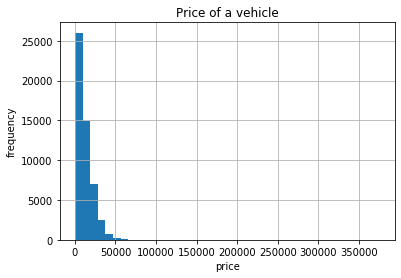

In [670]:
plt.title('Price of a vehicle')
data['price'].hist(bins=40)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

On this chart we see there are the most values around 'price' 10000, to be precise, around Q2, around the median of values. We can see Q2 is 9000 from describe() method above. Number of maximum price is so low that we can't even read from the chart, it' around zero, so I would say maximum value 375000 in 'price' is defintely outlier. As well, there is unusually large number around zero 'price' so we should look into that as well.

In [671]:
data['age_of_vehicle'].describe()

count    51522.000000
mean         8.550173
std          6.014509
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         82.000000
Name: age_of_vehicle, dtype: float64

Again, describe() method gives us important descriptive values.

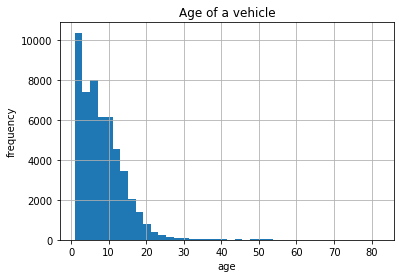

In [672]:
plt.title('Age of a vehicle')
data['age_of_vehicle'].hist(bins=40)
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

We could see there is small number (close to zero) of vehicles age 110 years, unusually a lot vehicles aged 1, most of vehicles are around age 7, but the data show standard deviation is 6 years. So, we have a lot of data in range of median-std and median+std (1 and 13 years old cars.) 110 is definitely an outlier.

In [673]:
data['odometer'].describe()

count     51522.000000
mean     115616.485336
std       61746.666830
min           1.000000
25%       74000.000000
50%      114764.500000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64

Again, describe() method gives us important descriptive values. we have Q2 (the median value) at 115024 miles with std of 60544. We expect most of the data in the range=(54480,175568) miles.

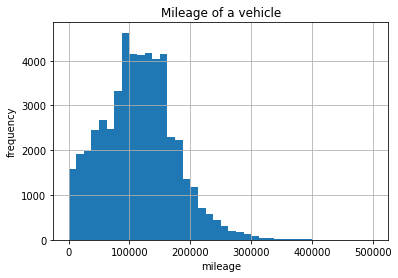

In [674]:
plt.title('Mileage of a vehicle')
data['odometer'].hist(bins=40,range=(0,500000))
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.show()

We can see that the number of vehicles with 'odometer' over 200000 is getting smaller. There are a lot of vehicles (around 1500) with 'odometer' close to zero.

In [675]:
data['cylinders'].describe()

count    51522.000000
mean         6.120958
std          1.657443
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

describe() method showed again typical descriptive values. Q2 (the median value) is 6. std is 1.6, so we expect most of the data in range of 4 and 8. max number of cylinders is 12. Luxurious cars like Ferraris, Lamborghinis, BMWs, Jaguars, and Mercedes-Benzes have 12 cylinder engine, so the number 12 is realistic. Lets's check our frequencies with histogram.

In [676]:
print(data['cylinders'].value_counts())

8     17709
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64


There are vehicles with 3, 4, 5, 6, 8, 10 or 12 cylinders in our data.

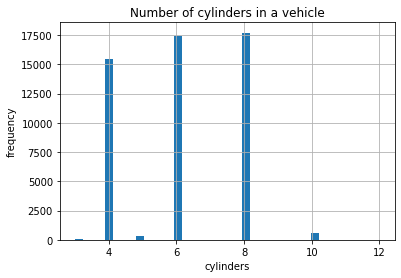

In [677]:
plt.title('Number of cylinders in a vehicle')
data['cylinders'].hist(bins=40)
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.show()

We can see the most vehicle engines have 4 to 8 cylinders. Vehicles with 12 cylinders are close to zero. 3,5 and 10 cylinder vehicles are also very close to zero.

In [678]:
data['condition'].describe()

count    51522.000000
mean         2.637553
std          0.712455
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

Vehicles are mostly in condition described with  number 3, which implies they are in excellent but not new condition.

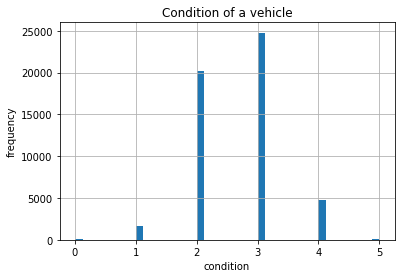

In [679]:
plt.title('Condition of a vehicle')
data['condition'].hist(bins=40)
plt.xlabel('condition')
plt.ylabel('frequency')
plt.show()

Here we have quite normal distribution of data, where number of new and salvage vehicles is very low. Before we got to see distribution of 'odometer' and we know that we have around 1500 cars with 'odometer' close to zero. Still, distibution of 'condition' shows that 'like new' and 'new' vehicles together don't make not even close to 1500 vehicles that have almost zero 'odometer'. So, I would say we have some 'inaccurate' data concering 'odometer'.

In [680]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_of_ad_placement,age_of_vehicle,miles_per_year
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799076,2.637553,6.120958,115616.485336,39.554773,2018.307480,8.550173,17783.730622
std,10041.060628,6.056042,0.712455,1.657443,61746.666830,28.204877,0.461455,6.014509,12407.925307
min,1.000000,1936.000000,0.000000,3.000000,1.000000,0.000000,2018.000000,1.000000,0.034483
25%,5000.000000,2007.000000,2.000000,4.000000,74000.000000,19.000000,2018.000000,4.000000,10936.285714
50%,9000.000000,2011.000000,3.000000,6.000000,114764.500000,33.000000,2018.000000,8.000000,15272.727273
75%,16838.000000,2014.000000,3.000000,8.000000,153000.000000,53.000000,2019.000000,12.000000,21000.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,82.000000,373200.000000


I am looking up on the numerical description of data, including the new columns we ad to the original data. I want to find upper limmits of outliers and store them in a separate DataFrame. Now is important to decide in which 'columns' to look for outliers. The standard deviation often helps us understand distributions and figure out how uniform datasets are. A dataset with all of its values close to the mean has a low standard deviation . If the standard deviation is high, the dataset might have anomalies and outliers. 

In [681]:
def upper_range(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    upper_value = Q3 + (1.5 * IQR)
    return upper_value

def lower_range(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    return lower_value


I created a function upper_range that takes a column from data and returns upper range of this column.
lower_range function that takes a column from data and returns lower range of the column.

In [682]:
upper_range_list = []
for column in data:
    try:
            print(upper_range(data[column]))
            upper_range.append(upper_range(data[column]))
    except:
        print('False')
print(upper_range_list)

34595.0
False
2024.5
False
False
4.5
False
14.0
False
False
271500.0
False
False
False
False
1.0
False
False
104.0
False
False
False
2020.5
False
24.0
False
36095.57142857143
False
[]


I used try-except method. When loop found quantitative variables, it applied upper_range function on the values and stored them into upper_range list. For categorical values, it stores False.

In [683]:
data.select_dtypes(exclude=['object','datetime64[ns]']).columns


Index(['price', 'model_year', 'condition', 'cylinders', 'odometer', 'is_4wd',
       'days_listed', 'year_of_ad_placement', 'age_of_vehicle',
       'miles_per_year'],
      dtype='object')

I excluded 'object' and 'datetime64[ns]' values so I could retrieve names for outliers DataFrame indices (down.)

In [684]:
outliers = pd.DataFrame({
    'upper_range_list': [34597.5, 2024.5, 4.5, 14.0, 254350.0, 104.0, 11.0, 20.5, 2020.5, 24.0, 40435.71428571429]
})
outliers.index = ['price', 'model_year', 'condition', 'cylinders', 'odometer',
       'days_listed', 'day_of_ad_placement', 'month_of_ad_placement',
       'year_of_ad_placement', 'age_of_vehicle', 'miles_per_year']
print(outliers)

                       upper_range_list
price                      34597.500000
model_year                  2024.500000
condition                      4.500000
cylinders                     14.000000
odometer                  254350.000000
days_listed                  104.000000
day_of_ad_placement           11.000000
month_of_ad_placement         20.500000
year_of_ad_placement        2020.500000
age_of_vehicle                24.000000
miles_per_year             40435.714286


I created an outlier data with upper_range values for every numerical column in our original data.

In [685]:
data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_of_ad_placement,age_of_vehicle,miles_per_year
count,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000,51522.000000
mean,12132.317554,2009.799076,2.637553,6.120958,115616.485336,39.554773,2018.307480,8.550173,17783.730622
std,10041.060628,6.056042,0.712455,1.657443,61746.666830,28.204877,0.461455,6.014509,12407.925307
min,1.000000,1936.000000,0.000000,3.000000,1.000000,0.000000,2018.000000,1.000000,0.034483
25%,5000.000000,2007.000000,2.000000,4.000000,74000.000000,19.000000,2018.000000,4.000000,10936.285714
50%,9000.000000,2011.000000,3.000000,6.000000,114764.500000,33.000000,2018.000000,8.000000,15272.727273
75%,16838.000000,2014.000000,3.000000,8.000000,153000.000000,53.000000,2019.000000,12.000000,21000.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,2019.000000,82.000000,373200.000000


Comparing upper range with max values I can decide which data should be filtered. Upper_range for 'price is smaler than maximum value in 'price' so we should filter 'price' values. We should filter as well for 'odometer', 'days_listed', 'age_of_vehicle' and 'miles_per_year'.

In [686]:
filtered_data = data.query('price < @upper_range(price) and odometer <  @upper_range(odometer) and days_listed  <  @upper_range(days_listed) and age_of_vehicle <  @upper_range(age_of_vehicle) and miles_per_year <  @upper_range(miles_per_year)')

filtered_data is data without the upper outliers, withing the upper range.

In [687]:
filtered_data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,year_of_ad_placement,age_of_vehicle,miles_per_year
count,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000,44061.000000
mean,10886.408298,2009.721432,2.624543,6.056717,116084.284356,36.527473,2018.316153,8.624157,15620.395959
std,7673.997275,4.887715,0.700136,1.646736,55476.368395,23.013537,0.464979,4.838626,6951.845770
min,1.000000,1995.000000,0.000000,3.000000,1.000000,0.000000,2018.000000,1.000000,0.052632
25%,4995.000000,2007.000000,2.000000,4.000000,78285.500000,18.000000,2018.000000,5.000000,10866.666667
50%,8750.000000,2010.000000,3.000000,6.000000,118000.000000,32.000000,2018.000000,8.000000,14625.000000
75%,15000.000000,2013.000000,3.000000,8.000000,153108.000000,51.000000,2019.000000,12.000000,19750.000000
max,34555.000000,2019.000000,5.000000,12.000000,271093.000000,103.000000,2019.000000,23.000000,36062.500000


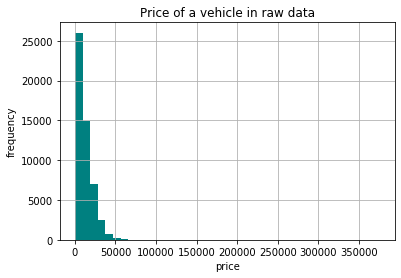

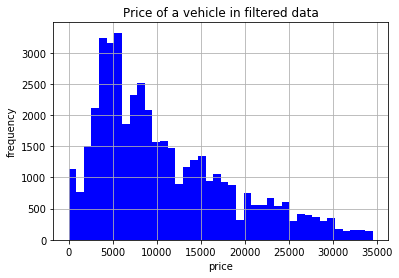

In [688]:
plt.title('Price of a vehicle in raw data')
data['price'].hist(bins = 40, color = 'teal')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

plt.title('Price of a vehicle in filtered data')
filtered_data['price'].hist(bins = 40, color = 'blue')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

We can se now the values are much better distributed alonx the 'x' axis, which means we can read frequency for every price there is in the 'price' column. The range of the prices is 10 times smaller. The frequencies are also in 10 times smaller range. In the fist histogram we couldn't do that, we could have read that the most of the prices are close to zero, which is not true. In filtered data we see the most of the prices are higher than 5000. Distibution is more similar to normal one, and I believe it would look even more'normal' if we used lower range for filtering the data.

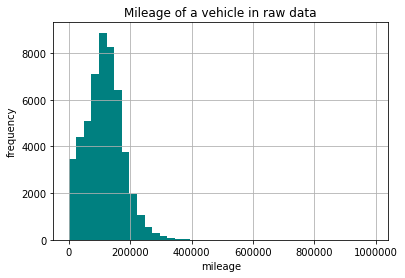

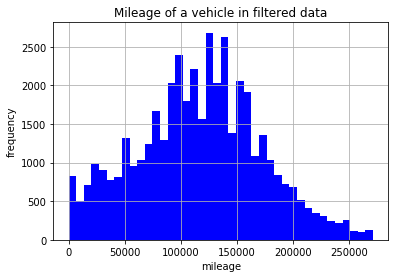

In [689]:
plt.title('Mileage of a vehicle in raw data')
data['odometer'].hist(bins = 40, color = 'teal')
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.show()

plt.title('Mileage of a vehicle in filtered data')
filtered_data['odometer'].hist(bins = 40, color = 'blue')
plt.xlabel('mileage')
plt.ylabel('frequency')
plt.show()

In [690]:
filtered_data['odometer'].describe()

count     44061.000000
mean     116084.284356
std       55476.368395
min           1.000000
25%       78285.500000
50%      118000.000000
75%      153108.000000
max      271093.000000
Name: odometer, dtype: float64

The range of miles in the first graph is from 0 to 1 000 000 and on the other from 0 to around 25 000, so it is 4 times smaller and values are now better distributed. From the first graph we could have read that there are more than 10 000 vehicles with around 100 000 miles. On the second graph we can now rean that there are less than 2000 vehicles with 100 000 miles. The interpretation is quite different. Standard deviation is still quite big for filtered 'odometar'. The reason could be because we were applying just the upper range but not the lower range while filtering.

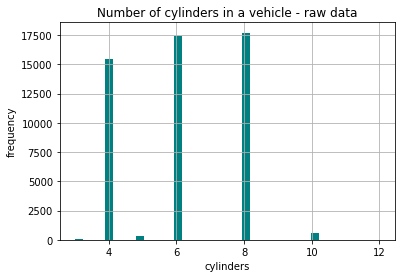

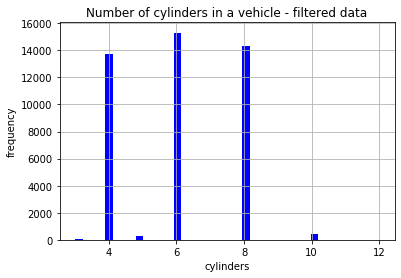

In [691]:
plt.title('Number of cylinders in a vehicle - raw data')
data['cylinders'].hist(bins = 40, color = 'teal')
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.show()

plt.title('Number of cylinders in a vehicle - filtered data')
filtered_data['cylinders'].hist(bins = 40, color = 'blue')
plt.xlabel('cylinders')
plt.ylabel('frequency')
plt.show()

The differences in graphs are not so big. We have 43371 entries in filtered data, 8154 entries less then  it the raw data, but the distribution of the values is still the same.

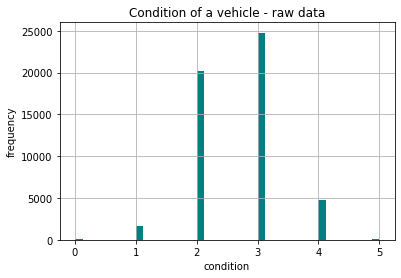

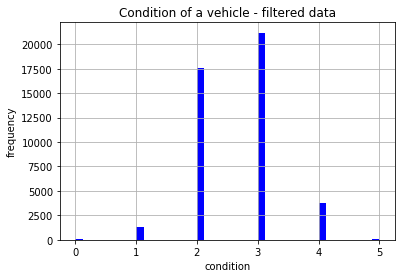

In [692]:
plt.title('Condition of a vehicle - raw data')
data['condition'].hist(bins = 40, color = 'teal')
plt.xlabel('condition')
plt.ylabel('frequency')
plt.show()

plt.title('Condition of a vehicle - filtered data')
filtered_data['condition'].hist(bins = 40, color = 'blue')
plt.xlabel('condition')
plt.ylabel('frequency')
plt.show()

The differences in graphs are not so big. 'y' axis are more refined in the second graph.

In [693]:
mean_days_listed = filtered_data['days_listed'].mean()
median_days_listed = filtered_data['days_listed'].median()
print(mean_days_listed,median_days_listed)

36.52747327568598 32.0


mean of 'days_listed' is 36.5 days and median 32 days. 

In [694]:
filtered_data['days_listed'].describe()

count    44061.000000
mean        36.527473
std         23.013537
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

Standard deviation is almost 23 days even after filtering the data. The most of the ads are listed in between 18 and 51 day.
I will cosider ads removed under 18 days to be too short listed. Ads that are listed more than 51 day to be long listed adds. At the end, ads listed more than 80 days I will consider abnormally long listed ads.

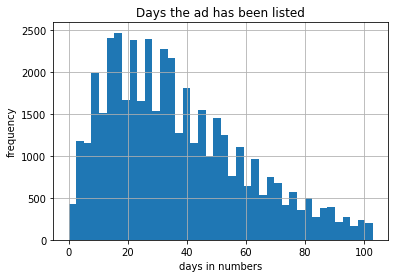

In [695]:
plt.title('Days the ad has been listed')
filtered_data['days_listed'].hist(bins=40)
plt.xlabel('days in numbers')
plt.ylabel('frequency')
plt.show()

We have 'days_listed' ads from 0 to more than 100 days listed.

In [696]:
data['too_short_period'] = data['days_listed'] < 18

I assume the ads removed under 18 days is too short listed period.

In [697]:
too_short_period_data = data.pivot_table(index='model', values='too_short_period')
print(too_short_period_data)
print(too_short_period_data.max())

                   too_short_period
model                              
acura tl                   0.228814
bmw x5                     0.198502
buick enclave              0.261993
cadillac escalade          0.208723
chevrolet camaro           0.205314
...                             ...
toyota sienna              0.231003
toyota tacoma              0.214027
toyota tundra              0.199005
volkswagen jetta           0.231214
volkswagen passat          0.274286

[100 rows x 1 columns]
too_short_period    0.274286
dtype: float64


In too_short_period_data are listed shares of means of ads placed less than 18 days, groped by their vehicle 'model'.

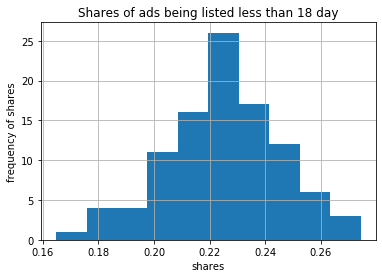

In [698]:
plt.title('Shares of ads being listed less than 18 day')
too_short_period_data['too_short_period'].hist()
plt.xlabel('shares')
plt.ylabel('frequency of shares')
plt.show()

Histogram of too short listed ads shows that the most of them have share between 0.20 and 0.24. I am interested in vehicles with share more than the most of the vehicles have.

In [699]:
too_short_period_data['too_short_period'].describe()

count    100.000000
mean       0.224858
std        0.021441
min        0.164835
25%        0.211368
50%        0.225682
75%        0.238441
max        0.274286
Name: too_short_period, dtype: float64

descibe() method shows even more precisely that most of the means are between 0.21 and 0.23. Minimum share is 1.16 and maximum share is 0.27.

In [700]:
bad_models = too_short_period_data.query('too_short_period > 0.23')

I decided bad_models are ads where vehicles 'models' have too_short_period share higher than 23%.

In [701]:
bad_data = filtered_data.query('model in @bad_models.index')
print(len(bad_data))
print(len(filtered_data))

20340
44061


bad_data is filtered filtered_data with entries which models correspond our bad_models data but we still need to filter in the 'days_listed'.

In [702]:
bad_final_data = bad_data.query('days_listed < 18')
print(len(bad_final_data))

5071


There are 4395 ads that I consider were removed quickly. They were removed under 18 days. 
Now I need to determine when were ads listed for abnormally long time.
As I mentioned above, ads listed more than 80 days I will consider abnormally long listed ads.

In [703]:
data['too_long_period'] = data['days_listed'] > 80

In [704]:
abnormally_long_period_data = data.pivot_table(index='model',values='too_long_period')
print(abnormally_long_period_data)

                   too_long_period
model                             
acura tl                  0.088983
bmw x5                    0.101124
buick enclave             0.088561
cadillac escalade         0.099688
chevrolet camaro          0.091787
...                            ...
toyota sienna             0.094225
toyota tacoma             0.071342
toyota tundra             0.086235
volkswagen jetta          0.088632
volkswagen passat         0.085714

[100 rows x 1 columns]


In abnormally_long_period_data are listed means of ads placed longer than 80 days, grouped for different vehicle 'model'.

In [705]:
abnormally_long_period_data['too_long_period'].describe()

count    100.000000
mean       0.088115
std        0.014188
min        0.053719
25%        0.078686
50%        0.088274
75%        0.096974
max        0.126074
Name: too_long_period, dtype: float64

descibe() method shows that most of the shares  of means are between 0.07 and 0.09. Minimum share is 0.05 and maximum share is 0.12.

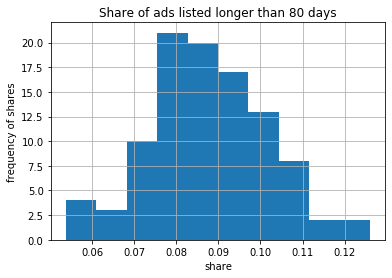

In [706]:
plt.title('Share of ads listed longer than 80 days')
abnormally_long_period_data['too_long_period'].hist()
plt.xlabel('share')
plt.ylabel('frequency of shares')
plt.show()

Ads with 'day_listed' means greater than 0.1 will consider abnormalyy long ones.

In [707]:
bad_long_models = abnormally_long_period_data.query('too_long_period > 0.1')
print(bad_long_models)

                         too_long_period
model                                   
bmw x5                          0.101124
chevrolet cruze                 0.111597
chevrolet suburban              0.110320
chevrolet trailblazer           0.101961
chrysler 200                    0.111111
chrysler town & country         0.111111
dodge charger                   0.103614
ford f-250 super duty           0.116183
ford f350 super duty            0.121951
ford fusion se                  0.103560
ford taurus                     0.108911
gmc acadia                      0.111111
gmc sierra 1500                 0.104857
honda civic lx                  0.106870
honda cr-v                      0.103650
kia soul                        0.126074
nissan murano                   0.102128
subaru impreza                  0.116000


In [708]:
bad_long_data = filtered_data.query('model in @bad_long_models.index')
print(len(bad_long_data))
print(len(filtered_data))

5732
44061


In [709]:
bad_long_data = bad_long_data.query('days_listed > 80')
print(len(bad_long_data))

407


At the end, we have 396 abnormally long listed ads.

In [710]:
type_of_vehicle = filtered_data.pivot_table(index='type',values='price',aggfunc=['count','mean'])
type_of_vehicle.columns = ['number_of_ads','mean_price']
print(type_of_vehicle)

             number_of_ads    mean_price
type                                    
SUV                  10910  10137.493126
bus                     21  18107.428571
convertible            325  12933.344615
coupe                 1874  13269.894344
hatchback              925   6630.415135
mini-van              1031   7656.316198
offroad                170  14262.529412
other                  209   9626.344498
pickup                5765  14700.261752
sedan                10920   6725.500000
truck                 9995  14647.795598
van                    518   8290.434363
wagon                 1398   8771.565093


I created a pivot table type_of_vehicle from filtered_data. Indicies are 'type', columns make 'number_of_vehicles' and 'mean_price'.

In [711]:
# importing the required module 
import matplotlib.pyplot as plt 

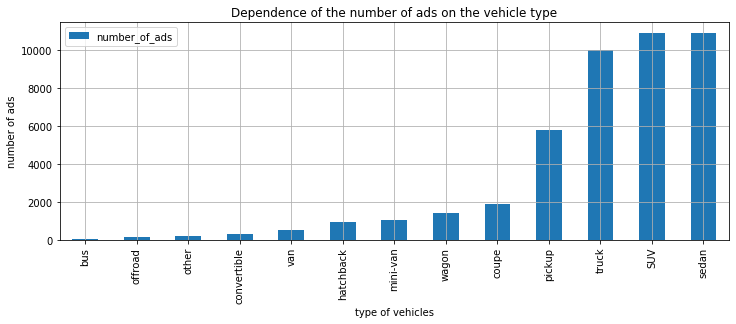

In [712]:
type_of_vehicle.sort_values(by='number_of_ads') \
    .plot(y='number_of_ads',title='Dependence of the number of ads on the vehicle type',figsize=(12,4),grid=True,kind='bar')
plt.xlabel('type of vehicles')
plt.ylabel('number of ads')
plt.show()

I like the values being sorted before plotting them, so I used sort_values method. 
'number_of_ads' id dependable of 'type' so we put dependable variable on y-axis. By default, on x-axis ere indices of type_of_vehicle pivot table.
From the chart, we can easily read which are the two types with the greatest numbers of ads; 'SUV' and 'sedan'.

In [713]:
SUV_ads = (filtered_data.query('type == "SUV"')\
.drop(['model','model_year','cylinders','fuel','type','is_4wd','date_posted','days_listed',\
       'day_of_ad_placement','month_of_ad_placement','year_of_ad_placement','miles_per_year'],axis='columns'))
print(len(SUV_ads))
print(SUV_ads.columns)

10910
Index(['price', 'condition', 'odometer', 'transmission', 'paint_color',
       'age_of_vehicle'],
      dtype='object')


Here I made a data slice SUV_ads. It contains only ads with SUV 'type', and columns 'price', 'condition', 'odometer', 'transmission', 'paint_color' and 'age_of_vehicle'.

In [714]:
sedan_ads = (filtered_data.query('type == "sedan"')\
.drop(['model','model_year','cylinders','fuel','type','is_4wd','date_posted','days_listed',\
       'day_of_ad_placement','month_of_ad_placement','year_of_ad_placement','miles_per_year'],axis='columns'))
print(len(sedan_ads))

10920


Here I made a data slice sedan_ads. It contains only ads with sedan 'type', and columns are the same as in SUV_ads.
We can se there are 3 SUV_ads more than sedan_ads.

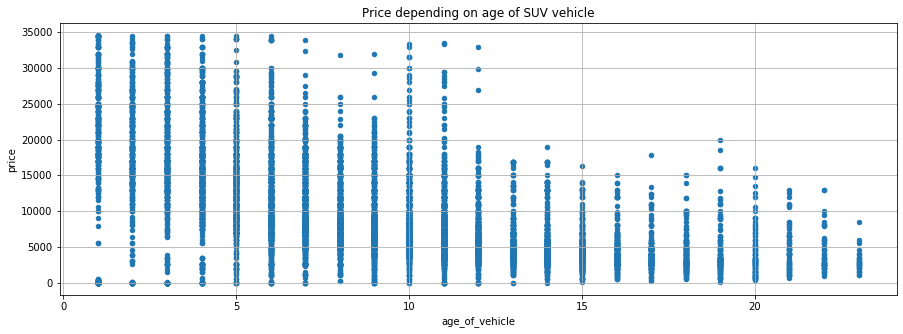

-0.5711150304502108


In [715]:
SUV_ads.plot(x='age_of_vehicle',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on age of SUV vehicle')
plt.show()
print(SUV_ads['price'].corr(SUV_ads['age_of_vehicle']))

I created scatterplot 'Price depending on age of vehicle' where each point represents two values (based on its position on 'age_of_vehicle' axis and on 'price' axis.) Data points close together tells us abouth 'typical' relationship, and the one that are far from the average. For example, we could say that usually price of the vehicle old 12 years is under 25000 but there are some exceptions with the price more than 25000.
As well, Pearson correlation coefficient between age and price is -0.5. Which means for most of the data we have tendencies. When one value increases, the other decreases. In our case, the higher the age of the vehicles, the lower the price. The dependeny is stonger when earson correlation coefficient is closer to -1.

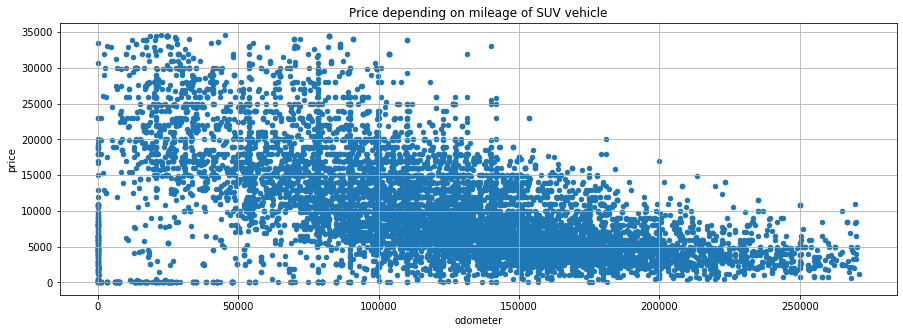

-0.5278124869979981


In [716]:
SUV_ads.plot(x='odometer',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on mileage of SUV vehicle')
plt.show()
print(SUV_ads['price'].corr(SUV_ads['odometer']))

In this chart we can see there is dependency between the mileage and the price of a car with Pearson correlation coefficient -0.49. This would say the more miles, the lower price and the fewer miles, bigger price.

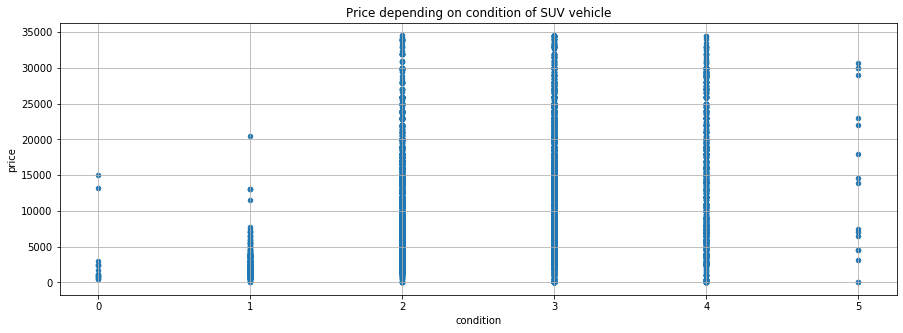

0.26387980895984287


In [717]:
SUV_ads.plot(x='condition',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on condition of SUV vehicle')
plt.show()
print(SUV_ads['price'].corr(SUV_ads['condition']))

In this chart we can see low dependency between the condition and the price of a car with Pearson correlation coefficient 0.25. Dependecy is positive, which means the better condition, the higher price. But still we can read from the chart that the data points for 2, 3 and condition 4 are in all the price range, so we could understand the dependeny is not that strong.

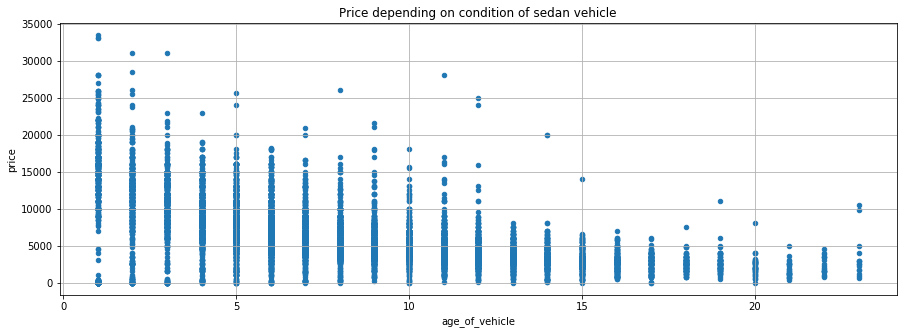

-0.6025258622933045


In [718]:
sedan_ads.plot(x='age_of_vehicle',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on condition of sedan vehicle')
plt.show()
print(sedan_ads['price'].corr(sedan_ads['age_of_vehicle']))

We have ditribution of data points for sedan very similar as for SUV. Pearson correlation coefficinet is very similar for SUV as well. -0.59 for sedan and -0.56 for SUV.

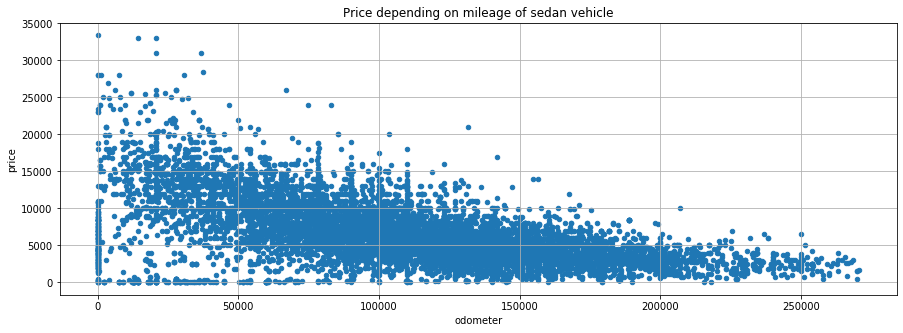

-0.5700277263945215


In [719]:
sedan_ads.plot(x='odometer',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on mileage of sedan vehicle')
plt.show()
print(sedan_ads['price'].corr(sedan_ads['odometer']))

We have ditribution of data points for sedan very similar as for SUV. Pearson correlation coefficinet is very similar for SUV as well. -0.52 for sedan and -0.49 for SUV.

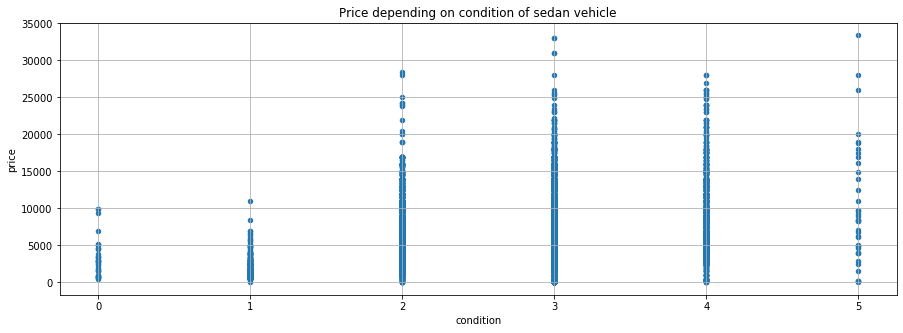

0.29810798746937006


In [721]:
sedan_ads.plot(x='condition',y='price',kind='scatter',figsize=(15,5),grid=True,title='Price depending on condition of sedan vehicle')
plt.show()
print(sedan_ads['price'].corr(sedan_ads['condition']))

We have ditribution of data points for sedan very similar as for SUV. Pearson correlation coefficinet is very similar for SUV as well. 0.29 for sedan and 0.25 for SUV.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


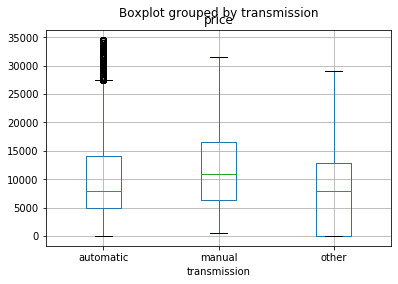

In [722]:
import numpy as np
import seaborn as sns
SUV_ads.boxplot(column=['price'], by='transmission',return_type ='axes')
plt.show()

Typical prices for SUV 'type' fall within the whiskers, while outliers are displayed as points outside of them. From the chart we can read that median price for manual transmission vehicles is higher than for automatic, higher than 10 000, and has minimum outliers. For automatic vehicles median price is under 10 000 but there are many outliers. For 'other' transmission vehicles median prices are the lowest and without outliers.

In [613]:
print(SUV_ads['paint_color'].value_counts())

Unknown    1948
black      1914
white      1681
silver     1404
grey       1058
blue        928
red         822
green       399
brown       329
custom      279
orange       71
yellow       39
purple       38
Name: paint_color, dtype: int64


We can see here the most common colors for SUVs ads.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


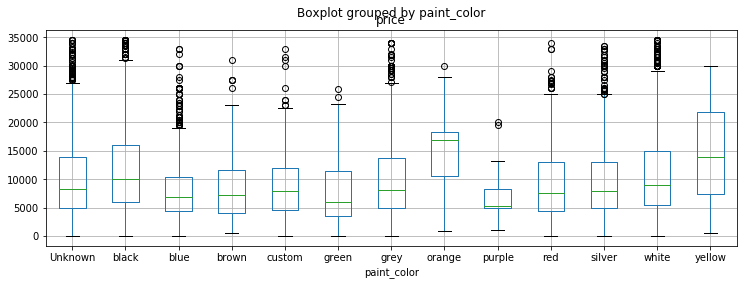

In [614]:
SUV_ads.boxplot(column=['price'], by='paint_color',return_type ='axes',figsize=(12,4))
plt.show()

Most of the mean prices are in between 5 000 and 10 000.
We can read that the least common SUV's colors (orange, yellow, purpule) have the least or no price outliers. The most common colors (black, white, silver) have a lot outliers and the highest maximum price is with black SUVs.
So I would say, the price of SUV has no significant dependency on color of SUVs.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


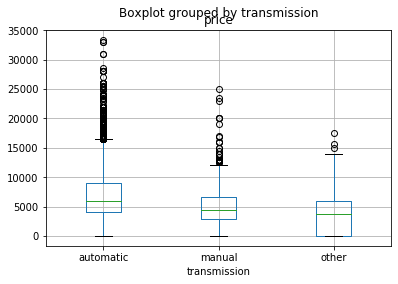

In [615]:
sedan_ads.boxplot(column=['price'], by='transmission',return_type ='axes')
plt.show()

From the chart we can read that median price for manual transmission sedan vehicles is under 5000, lower than for automatic, which is higher than 5000. By SUV was the other way around. Still, we see the same distribution as with SUV.
I would conclude that median price for automatic sedan vehicle is a bit more than for an manual. There are more outliers for automatic sedans than for manual. I would say the price is higher if the vehicle is automatic.

In [616]:
print(sedan_ads['paint_color'].value_counts())

Unknown    1984
silver     1832
black      1581
grey       1454
white      1342
blue       1118
red         852
custom      269
brown       244
green       192
purple       22
yellow       21
orange        9
Name: paint_color, dtype: int64


By sedan vehicles, we have the most common colors; silver, black, grey. The least common colors are the same as for SUVs.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


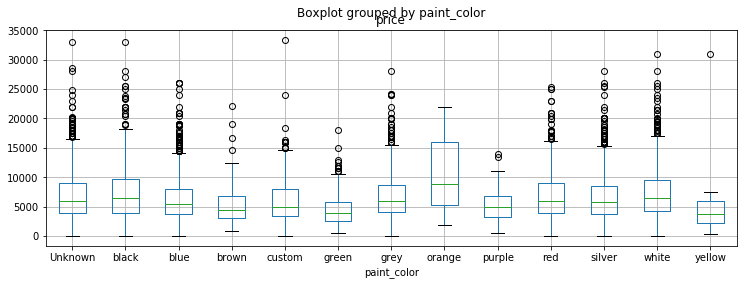

In [617]:
sedan_ads.boxplot(column=['price'], by='paint_color',return_type ='axes',figsize=(12,4))
plt.show()

The most of the mean values are between 5000 and 10000. There is very similar distribution of data dots to the SUV's. I see no significant dependence on price with 'paint_color'.

### Conclusion

I studied how outliers affect the form and readability of the histograms, determined the upper limits of outliers, removed the outliers and stored them in a separate DataFrame.

I used the filtered data to plot new histograms and compared them with the earlier histograms (the ones that included outliers).

I determine when ads were removed quickly, and when they were listed for an abnormally long time, analized the number of ads and the average price for each type of vehicle, plotted a graph showing the dependence of the number of ads on the vehicle type.

I used plot box-and-whisker charts and scatterplots to make my final analysis and to find an overall conclusion.

OVERALL CONCLUSION:

There are tendencies (with  Pearson correlation coefficinet for SUVs -0.56 and for sedans -0.59) that the higher the age, the lower the price of the vehicle. 

The more miles the vehicle has, the price is lower (Pearson correlation coefficinet for SUVs is -0.49 and for sedans is -0.52).

Price also depends of the vehicles transmission. Dependency changes for a different type. For example, SUVs median price is higher for manual than for automatic, still there are more outliers within automatic vehicles. For sedan type of vehicles the mean value is higher for automatic transmission and there are more outliers for automatic than for manual.